# Оформление проекта

Определитесь, в каком виде вы хотите представить ваш проект. Мы предлагаем вам сделать интерактивное демо, содержащее:

* карты с визуализацией реального и прогнозируемого спроса на такси в выбираемый пользователем момент времени
* временной ряд фактического и прогнозируемого спроса на такси в выбираемой области.

Немного материалов о том, как в ноутбуках можно делать интерактивные графики:

* https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/
* http://nbviewer.jupyter.org/github/quantopian/ipython/blob/master/examples/Interactive%20Widgets/Index.ipynb
* https://github.com/ioam/holoviews

Чтобы сдать задание, создайте демо и дайте ссылку на него.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import gc
from datetime import timedelta
import datetime
%matplotlib inline

In [2]:
%%time
data = pd.read_csv('../result_data_new.csv', index_col='pickup_datetime', parse_dates=['pickup_datetime'], 
                   usecols=['region_id', 'count', 'pickup_datetime'])
data = data["2016-06-01":]
data.reset_index(inplace=True)
regions = np.unique(data['region_id'])
data.set_index(["region_id", "pickup_datetime"], inplace=True)

Wall time: 2.82 s


In [3]:
print data.head()
print data.tail()

                           count
region_id pickup_datetime       
1075      2016-06-01          26
1076      2016-06-01          30
1077      2016-06-01          19
1125      2016-06-01          39
1126      2016-06-01          71
                               count
region_id pickup_datetime           
2068      2016-06-30 23:00:00    147
2069      2016-06-30 23:00:00     38
2118      2016-06-30 23:00:00    173
2119      2016-06-30 23:00:00    119
2168      2016-06-30 23:00:00      0


In [4]:
print data[(data.index.get_level_values("region_id") == 1075) 
                & (data.index.get_level_values("pickup_datetime") == "2016-06-01 00:00:00")]

                           count
region_id pickup_datetime       
1075      2016-06-01          26


In [4]:
predicted_data = pd.read_csv('../week 6/results.txt', index_col='id')

In [53]:
predicted_data['region_id'] = predicted_data.index.map(lambda x: int(x[0:4]))
predicted_data['pickup_datetime'] = predicted_data.index.map(lambda x: x[5:15] + " " + 
                                                             ("0" + x[16:17] + ":00:00" if x[17] is "_" 
                                                              else x[16:18] + ":00:00"))
predicted_data.reset_index(inplace=True)
predicted_data.set_index(["region_id", "pickup_datetime"], inplace=True)
print predicted_data.head()

                                                 id          y
region_id pickup_datetime                                     
1075      2016-05-31 23:00:00  1075_2016-05-31_23_1  24.333333
          2016-05-31 23:00:00  1075_2016-05-31_23_2  16.944444
          2016-05-31 23:00:00  1075_2016-05-31_23_3  10.500000
          2016-05-31 23:00:00  1075_2016-05-31_23_4   7.277778
          2016-05-31 23:00:00  1075_2016-05-31_23_5   6.000000


In [54]:
new_index = pd.MultiIndex.from_tuples(np.unique(predicted_data.index), names=['region_id', 'pickup_datetime'])
tmp = pd.DataFrame(index=new_index)

In [55]:
tmp.head()

Empty DataFrame
Columns: []
Index: [(1075, 2016-05-31 23:00:00), (1075, 2016-06-01 00:00:00), (1075, 2016-06-01 01:00:00), (1075, 2016-06-01 02:00:00), (1075, 2016-06-01 03:00:00)]

In [56]:
tmp['s'] = 0
tmp.ix[(1075, '2016-06-01 00:00:00')]['s'] = 3

In [67]:
%%time
for i in range(1,7):
    tmp['y_t+' + str(i)] = np.NaN
#dates = pd.date_range("2016-05-31 23:00:00", "2016-06-30 17:00:00")
#for region in regions:
#    for date in dates:
#        tmp.loc[(region, date)].iloc[0, -6:] = predicted_data.ix[(region, date), 'y'].values
for (idx, value) in predicted_data.iterrows():
    #print idx
    #print value
    id_n = idx[0], idx[1]
    #print id_n
    #print value['y']
    #print value["id"][-1]
    #print tmp.ix[id_n]
    #print tmp.ix[id_n]['y_t+' + value["id"][-1]]
    tmp.loc[id_n, 'y_t+' + value["id"][-1]] = value['y']
    #break
    #tmp.loc[1075, "2016-05-31 23:00:00"]['y_t+' + value["id"][-1]][0] = value['y']

Wall time: 6min 19s


In [78]:
print tmp.head()
print predicted_data.head()

                                   y_t+1      y_t+2      y_t+3      y_t+4  \
region_id pickup_datetime                                                   
1075      2016-05-31 23:00:00  24.333333  16.944444  10.500000   7.277778   
          2016-06-01 00:00:00  26.333333  16.444444   5.500000   4.611111   
          2016-06-01 01:00:00   8.000000   3.888889   5.777778   8.388889   
          2016-06-01 02:00:00   5.333333   4.166667  10.833333  19.500000   
          2016-06-01 03:00:00   5.777778   9.222222  19.500000  42.444444   

                                   y_t+5      y_t+6  
region_id pickup_datetime                            
1075      2016-05-31 23:00:00   6.000000   9.111111  
          2016-06-01 00:00:00   9.444444  20.111111  
          2016-06-01 01:00:00  21.666667  48.888889  
          2016-06-01 02:00:00  47.111111  88.722222  
          2016-06-01 03:00:00  70.888889  66.000000  
                                                 id          y
region_id pickup_da

In [76]:
tmp.drop('s', axis=1, inplace=True)

In [79]:
tmp.to_csv("model_results.csv")

In [5]:
tmp2 = pd.read_csv("model_results.csv", index_col=['region_id', 'pickup_datetime'])
print tmp2.head()

                                   y_t+1      y_t+2      y_t+3      y_t+4  \
region_id pickup_datetime                                                   
1075      2016-05-31 23:00:00  24.333333  16.944444  10.500000   7.277778   
          2016-06-01 00:00:00  26.333333  16.444444   5.500000   4.611111   
          2016-06-01 01:00:00   8.000000   3.888889   5.777778   8.388889   
          2016-06-01 02:00:00   5.333333   4.166667  10.833333  19.500000   
          2016-06-01 03:00:00   5.777778   9.222222  19.500000  42.444444   

                                   y_t+5      y_t+6  
region_id pickup_datetime                            
1075      2016-05-31 23:00:00   6.000000   9.111111  
          2016-06-01 00:00:00   9.444444  20.111111  
          2016-06-01 01:00:00  21.666667  48.888889  
          2016-06-01 02:00:00  47.111111  88.722222  
          2016-06-01 03:00:00  70.888889  66.000000  


In [6]:
from mpl_toolkits.basemap import Basemap

ImportError: No module named basemap

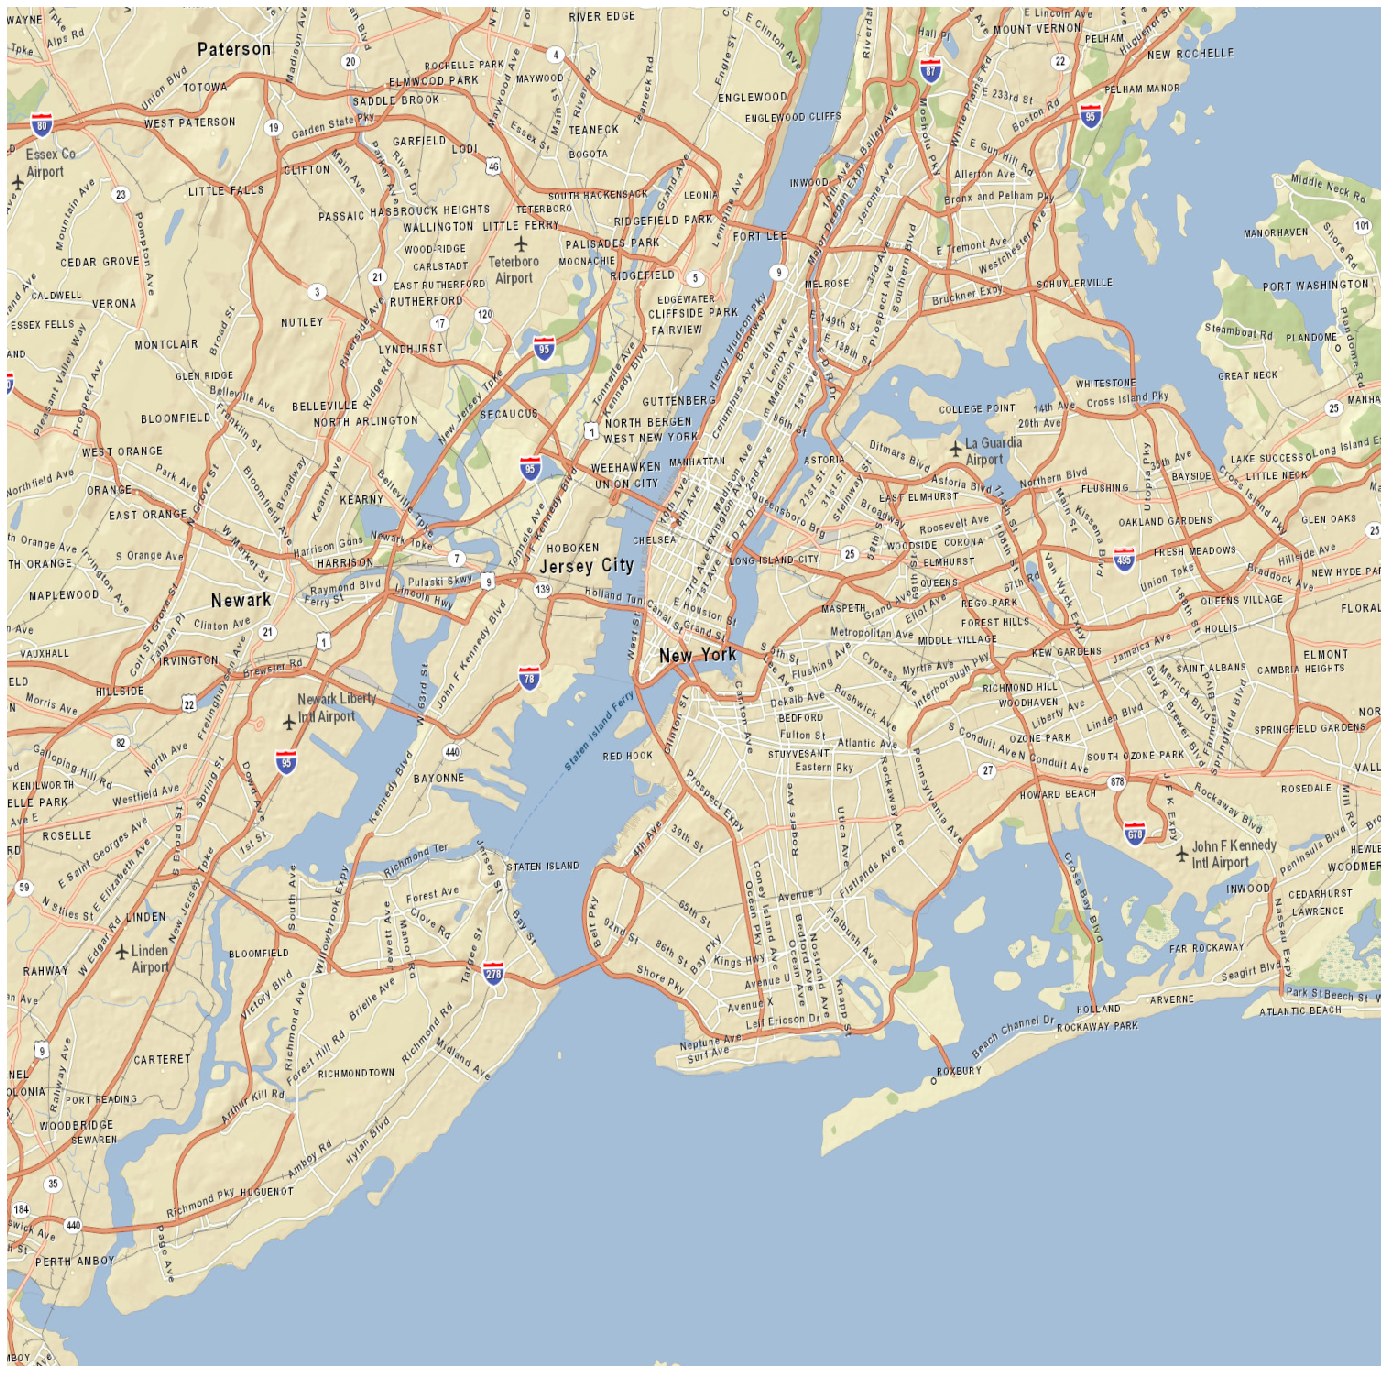

In [52]:
ny_west, ny_east, ny_south, ny_north = -74.30, -73.68, 40.48, 40.92
fig = plt.figure(figsize=(25,25))
m = Basemap(llcrnrlon=ny_west, llcrnrlat=ny_south, urcrnrlon=ny_east, urcrnrlat=ny_north, 
            projection='merc', epsg=32016)
m.arcgisimage(service="ESRI_StreetMap_World_2D", xpixels=1500)
plt.show()

In [6]:
def get_predicted_data(df, region, date):
    return df[(df.index.get_level_values("region_id") == region) 
                & (df.index.get_level_values("pickup_datetime") == date)].values.reshape((6,))

def get_true_data(df, region, date):
    result = []
    date = pd.to_datetime(date) + timedelta(hours=1)
    dates = pd.date_range(date, date + timedelta(hours=5), freq='1H')
    for date in dates:
        result.append(df[(df.index.get_level_values("region_id") == region) 
                & (df.index.get_level_values("pickup_datetime") == date)].values[0][0])
    return np.array(result)

In [7]:
t = get_predicted_data(tmp2, 1075, "2016-05-31 23:00:00")
print t

[ 24.33333333  16.94444444  10.5          7.27777778   6.           9.11111111]


In [8]:
t = get_true_data(data, 1075, "2016-05-31 23:00:00")
print t

[26 14  5  2  1  7]



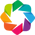

In [9]:
import numpy as np
import holoviews as hv
hv.extension('bokeh')

In [20]:
print t.transpose()
dates = pd.date_range(t.index[0][1], pd.to_datetime(t.index[0][1]) + timedelta(hours=5), freq='1H')
tt = pd.DataFrame(data={'y': t.values.reshape((6,)), 'date':dates})
print tt

[26 14  5  2  1  7]


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [75]:
t.index[0][1]

'2016-05-31 23:00:00'

In [10]:
def draw_plot(data, key_name, value_name, label):
    return hv.Curve(data, kdims=[key_name], vdims=[value_name], label=label)


def draw_series(date, region):
    true_values = get_true_data(data, region, date)
    predicted_values = get_predicted_data(tmp2, region, date)
    dates = pd.date_range(date, pd.to_datetime(date) + timedelta(hours=5), freq='1H')
    #print predicted_values
    #print true_values
    tt = pd.DataFrame(data={'y': predicted_values, 'date': dates, 'real_y': true_values})
    #%%opts Curve  [height=100 width=200 xaxis='bottom' show_grid=True tools=['hover']]
    return draw_plot(tt, 'date', 'y', 'predicted') * draw_plot(tt, 'date', 'real_y', 'true')
    #fig = plt.figure(figsize=(25,10))
    #plt.plot(tt['date'], tt['y'])
    #plt.plot(tt['date'], tt['real_y'])

In [22]:
#pd.date_range(t.index[0][1], pd.to_datetime(t.index[0][1]) + timedelta(hours=6), freq='1H')

In [16]:
#%output size=400
%opts Curve  [height=100 width=200 xaxis='bottom' show_grid=True tools=['hover']]
draw_series("2016-05-31 23:00:00", 1075)

:Overlay
   .Curve.Predicted :Curve   [date]   (y)
   .Curve.True      :Curve   [date]   (real_y)

In [19]:
hv.Curve(tt, kdims=['date'], vdims=['y'])

NameError: name 'tt' is not defined

In [80]:
import param
import paramnb
from bokeh import sampledata
from bokeh.sampledata import stocks
from holoviews.operation.timeseries import rolling, rolling_outlier_std
from holoviews.streams import Stream

def load_symbol(symbol, variable='adj_close', **kwargs):
    df = pd.DataFrame(getattr(stocks, symbol))
    df['date'] = df.date.astype('datetime64[ns]')
    return hv.Curve(df, kdims=[('date', 'Date')],
                    vdims=[variable])

class StockExplorer(hv.streams.Stream):
    
    rolling_window = param.Integer(default=10, bounds=(1, 365))
    
    symbol = param.ObjectSelector(default='AAPL', objects=stocks.stocks)
    
    def view(self):
        stocks = hv.DynamicMap(load_symbol, kdims=[], streams=[self])

        # Apply rolling mean
        smoothed = rolling(stocks, streams=[self])

        # Find outliers
        outliers = rolling_outlier_std(stocks, streams=[self])
        return smoothed * outliers

dmap = hv.DynamicMap(load_symbol, kdims=['Symbol']).redim.values(Symbol=stocks.stocks)
dmap

   adj_close   close        date    high     low    open    volume
0      31.68  130.31  2000-03-01  132.06  118.50  118.56  38478000
1      29.66  122.00  2000-03-02  127.94  120.69  127.00  11136800
2      31.12  128.00  2000-03-03  128.23  120.00  124.87  11565200
3      30.56  125.69  2000-03-06  129.13  125.00  126.00   7520000
4      29.87  122.87  2000-03-07  127.44  121.12  126.44   9767600
   adj_close  close        date   high    low   open     volume
0      33.68  90.81  2000-03-01  94.09  88.94  89.62  106889800
1      34.63  93.37  2000-03-02  95.37  91.12  91.81  106932600
2      35.65  96.12  2000-03-03  98.87  93.87  94.75  101435200
3      33.61  90.62  2000-03-06  97.37  90.12  96.00   93609400
4      34.45  92.87  2000-03-07  97.50  91.94  96.12  135061000


:DynamicMap   [Symbol]

In [61]:
%opts Curve [width=600] {+framewise} Scatter (color='red' marker='triangle')
explorer = StockExplorer()
paramnb.Widgets(explorer, continuous_update=True, callback=explorer.event, on_init=True)
explorer.view()

<IPython.core.display.Javascript object>

:DynamicMap   []

In [87]:
pd.date_range("2016-05-31 23:00:00" : "2016-06-2 23:00:00")

MultiIndex(levels=[[1075, 1076, 1077, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1221, 1222, 1223, 1224, 1225, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1272, 1273, 1274, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1326, 1327, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1376, 1377, 1378, 1380, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1426, 1431, 1434, 1435, 1436, 1437, 1438, 1439, 1441, 1442, 1480, 1482, 1483, 1530, 1532, 1533, 1580, 1630, 1684, 1733, 1734, 1783, 2068, 2069, 2118, 2119, 2168], [2016-06-01 00:00:00, 2016-06-01 01:00:00, 2016-06-01 02:00:00, 2016-06-01 03:00:00, 2016-06-01 04:00:00, 2016-06-01 05:00:00, 2016-06-01 06:00:00, 2016-06-01 07:00:00, 2016-06-01 08:00:00, 2016-06-01 09:00:00, 2016-06-01 10:00:00, 2016-06-01 11:00:00, 2016-06-01 12:00:00, 2016-06-01 13:00:00, 2016-06-01 14:00:00, 2016-06-01 15:00:00, 2016-06-01 16:00:00, 2016-06-0

In [95]:
import param
import paramnb
from holoviews.operation.timeseries import rolling, rolling_outlier_std
from holoviews.streams import Stream

def test_f(symbol, **kwargs):
    print type(kwargs)
    print kwargs
    return draw_series("2016-05-31 23:00:00", 1075)

class TaxiPredictionExplorer(hv.streams.Stream):
    
    region = param.ObjectSelector(default=regions[0], objects=regions)
    
    def __init__(self, data, predicted_data):
        self.data = data
        self.predicted_data = predicted_data
    
    def view(self):
        series_plot = hv.DynamicMap(test_f, kdims=[], streams=[self])
        return series_plot
    
    
dmap = hv.DynamicMap(test_f, kdims=['date']).redim.values(date=pd.date_range("2016-05-31 23:00:00", "2016-06-2 23:00:00"))
dmap

<type 'dict'>
{}
<type 'dict'>
{}


:DynamicMap   [date]

In [96]:
%opts Curve [width=600]
explorer = TaxiPredictionExplorer(data, tmp2)
paramnb.Widgets(explorer, continuous_update=True, callback=explorer.event, on_init=True)
explorer.view()

<IPython.core.display.Javascript object>

AttributeError: 'TaxiPredictionExplorer' object has no attribute '_rename'

In [103]:
print regions

[1075 1076 1077 1125 1126 1127 1128 1129 1130 1131 1132 1172 1173 1174 1175
 1176 1177 1178 1179 1180 1181 1182 1183 1184 1221 1222 1223 1224 1225 1227
 1228 1229 1230 1231 1232 1233 1234 1235 1272 1273 1274 1278 1279 1280 1281
 1282 1283 1284 1285 1286 1287 1326 1327 1331 1332 1333 1334 1335 1336 1337
 1338 1339 1376 1377 1378 1380 1382 1383 1384 1385 1386 1387 1388 1389 1390
 1426 1431 1434 1435 1436 1437 1438 1439 1441 1442 1480 1482 1483 1530 1532
 1533 1580 1630 1684 1733 1734 1783 2068 2069 2118 2119 2168]


In [20]:
dates = pd.date_range("2016-05-31 23:00:00", "2016-06-30 17:00:00", freq='1h').astype(str)
print dates.values

['2016-05-31 23:00:00' '2016-06-01 00:00:00' '2016-06-01 01:00:00'
 '2016-06-01 02:00:00' '2016-06-01 03:00:00' '2016-06-01 04:00:00'
 '2016-06-01 05:00:00' '2016-06-01 06:00:00' '2016-06-01 07:00:00'
 '2016-06-01 08:00:00' '2016-06-01 09:00:00' '2016-06-01 10:00:00'
 '2016-06-01 11:00:00' '2016-06-01 12:00:00' '2016-06-01 13:00:00'
 '2016-06-01 14:00:00' '2016-06-01 15:00:00' '2016-06-01 16:00:00'
 '2016-06-01 17:00:00' '2016-06-01 18:00:00' '2016-06-01 19:00:00'
 '2016-06-01 20:00:00' '2016-06-01 21:00:00' '2016-06-01 22:00:00'
 '2016-06-01 23:00:00' '2016-06-02 00:00:00' '2016-06-02 01:00:00'
 '2016-06-02 02:00:00' '2016-06-02 03:00:00' '2016-06-02 04:00:00'
 '2016-06-02 05:00:00' '2016-06-02 06:00:00' '2016-06-02 07:00:00'
 '2016-06-02 08:00:00' '2016-06-02 09:00:00' '2016-06-02 10:00:00'
 '2016-06-02 11:00:00' '2016-06-02 12:00:00' '2016-06-02 13:00:00'
 '2016-06-02 14:00:00' '2016-06-02 15:00:00' '2016-06-02 16:00:00'
 '2016-06-02 17:00:00' '2016-06-02 18:00:00' '2016-06-02 19:00

In [21]:
%opts Curve [width=100]
frequencies = [0.5, 0.75, 1.0, 1.25]
dates = pd.date_range("2016-05-31 23:00:00", "2016-06-30 17:00:00", freq='1h').astype(str)

def sine_curve(phase, freq):
    xvals = [0.1* i for i in range(100)]
    return hv.Curve((xvals, [np.sin(phase+freq*x) for x in xvals]))

# When run live, this cell's output should match the behavior of the GIF below
#dmap = hv.DynamicMap(sine_curve, kdims=['phase', 'frequency'])
#dmap.redim.range(phase=(0.5,1)).redim.values(frequency=frequencies)

# When run live, this cell's output should match the behavior of the GIF below
dmap = hv.DynamicMap(draw_series, kdims=['date', 'region'])
dmap.redim.values(date=dates).redim.values(region=regions)

:DynamicMap   [date,region]

In [109]:
%opts Curve [width=100]
frequencies = [0.5, 0.75, 1.0, 1.25]

def sine_curve(phase, freq):
    xvals = [0.1* i for i in range(100)]
    return hv.Curve((xvals, [np.sin(phase+freq*x) for x in xvals]))

# When run live, this cell's output should match the behavior of the GIF below
dmap = hv.DynamicMap(sine_curve, kdims=['phase', 'frequency'])
dmap.redim.range(phase=(0.5,1)).redim.values(frequency=frequencies)

:DynamicMap   [phase,frequency]